This notebook is for our core analyses of the pilot data for the Noise-Correction Correlation project.

Created March 7, 2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr, norm, gmean, sem, median_abs_deviation
import matplotlib.ticker as ticker
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Load in data

In [ ]:
def compute_variances(data):
    '''
    takes in n x m dataframe representing n participants and m thresholds (log units)
    
    returns within-participant and across-participant variances
    '''
    
    # Noise: variance within individuals
    within_indiv_var = np.mean(np.var(data, axis = 1, ddof=1))

    # Signal: variance across individuals
    across_indiv_var = np.var(np.mean(data, axis = 1), ddof=1)
    
    return within_indiv_var, across_indiv_var

In [3]:
rsvp = pd.read_csv("df_rsvp.csv")
log_rsvp = np.log10(rsvp)

In [86]:
bouma_left = pd.read_csv("df_bouma_left.csv")
bouma_right = pd.read_csv("df_bouma_right.csv")
bouma = (bouma_right + bouma_left)/2
log_bouma = np.log10(bouma)

In [87]:
acuity_left = pd.read_csv("df_acuity_left.csv")
acuity_right = pd.read_csv("df_acuity_right.csv")
acuity = (acuity_right + acuity_left)/2
log_acuity = np.log10(acuity)

In [6]:
vernier = pd.read_csv("df_vernier.csv")
log_vernier = np.log10(vernier)

In [7]:
reading = pd.read_csv("df_reading.csv")
log_reading = np.log10(reading)

## Functions for plots and variances

In [8]:
def compute_variances(data):
    '''
    takes in n x m dataframe representing n participants and m thresholds (log units)
    
    returns within-participant and across-participant variances
    '''
    
    # Noise: variance within individuals
    within_indiv_var = np.mean(np.var(data, axis = 1, ddof=1))

    # Signal: variance across individuals
    across_indiv_var = np.var(np.mean(data, axis = 1), ddof=1)
    
    return within_indiv_var, across_indiv_var

In [70]:
def plot_mean_thresholds(df, var_name="Bouma factor", ylims = [0.1, 0.7]):
    """
    Plots mean and median of thresholds across participants for each repeat with error bars
    
    Parameters:
    df (numpy.ndarray or pandas.DataFrame): A dataset where each column represents a different block/repeat
                                               and each row is a participant's data.
    var_name (str): The name of the variable being plotted (used in the title and y-axis label).
    """
    plt.figure(figsize=(8, 6))

    # Shaded patch
    patch_min = 0.18
    patch_max = 0.41
    plt.axhspan(patch_min, patch_max, color='lightgray', alpha=0.5)

    # X-axis positions
    x = np.arange(1, df.shape[1] + 1)

    # Compute statistics
    median_values = np.nanmedian(df, axis=0)
    mean_values = gmean(df, axis=0, nan_policy='omit')

    # Compute error bars
    median_errors = median_abs_deviation(df, axis=0, nan_policy='omit')  # MAD for median
    mean_errors = sem(df, axis=0, nan_policy='omit')  # SEM for mean

    # Plot with error bars
    plt.errorbar(x, median_values, yerr=median_errors, fmt='o-', color='orange', label='Median', capsize=0)
    plt.errorbar(x + .08, mean_values, yerr=mean_errors, fmt='o-', color='red', label='Mean', capsize=0)

    # Formatting
    plt.title(f'Mean {var_name} (N = {df.shape[0]})', fontsize=16)
    plt.xlabel('Repeats', fontsize=16)
    plt.xticks(x, size=14)
    plt.ylabel(var_name, fontsize=16)
    plt.legend(fontsize='large')

    # Log scale and tick formatting
    plt.yscale('log')
    plt.yticks(np.linspace(ylims[0], ylims[1], 5), size=14)
    plt.ylim(ylims)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.show()

In [71]:
def plot_thresholds(df, var_name="Bouma factor", ylims = [0.08, 1.2]):
    """
    Plots thresholds for each participant across repeats.
    
    Parameters:
    df (pandas.DataFrame or numpy.ndarray): A dataset where each column represents a different repeat,
                                            and each row is a participant's data.
    var_name (str): The name of the variable being plotted (used in the title and y-axis label).
    """
    plt.figure(figsize=(8, 6))

    # Shaded patch
    patch_min = 0.18
    patch_max = 0.41
    plt.axhspan(patch_min, patch_max, color='lightgray', alpha=0.5)

    # X-axis positions
    x = np.arange(1, df.shape[1] + 1)

    # Iterate over rows properly
    for i, row in enumerate(df.values):  # Convert DataFrame to array for iteration
        plt.plot(x, row, marker='o', linestyle='-', label=f'Participant {i+1}')

    # Formatting
    plt.title(f'{var_name} (N = {df.shape[0]})', fontsize=16)
    plt.xlabel('Repeats', fontsize=16)
    plt.xticks(x, size=14)
    plt.ylabel(var_name, fontsize=16)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Log scale and tick formatting
    plt.yscale('log')
    plt.yticks(np.linspace(ylims[0], ylims[1], 5), size=14)
    plt.ylim(ylims)

    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.show()

## Compute mean, variances, SNR for each task

In [72]:
# rsvp

mean_logRSVP = np.log10(np.mean(gmean(rsvp, axis = 0, nan_policy='omit')))
print("mean of log:", np.round(mean_logRSVP, decimals=4))

withinVar_logRSVP, betweenVar_logRSVP = compute_variances(np.log10(rsvp))
print("within var of log:", np.round(withinVar_logRSVP, decimals=4))
print("across var of log:", np.round(betweenVar_logRSVP, decimals=4))
print("SNR:", np.round(betweenVar_logRSVP / withinVar_logRSVP, decimals=3))

mean of log: 2.9005
within var of log: 0.0157
across var of log: 0.0558
SNR: 3.548


In [73]:
# crowding

bouma_postLearning = bouma.iloc[:,2:]
mean_logCrowding = np.log10(np.mean(gmean(bouma_postLearning, axis = 0, nan_policy='omit')))
print("mean of log:", np.round(mean_logCrowding, decimals=4))

withinVar_logCrowding, betweenVar_logCrowding = compute_variances(np.log10(bouma_postLearning))
print("within var of log:", np.round(withinVar_logCrowding, decimals=4))
print("across var of log:", np.round(betweenVar_logCrowding, decimals=4))
print("SNR:", np.round(betweenVar_logCrowding / withinVar_logCrowding, decimals=3))

mean of log: -0.55
within var of log: 0.0141
across var of log: 0.0254
SNR: 1.799


In [88]:
# Acuity

mean_logAcuity = np.log10(np.mean(gmean(acuity, axis = 0, nan_policy='omit')))
print("mean of log:", np.round(mean_logAcuity, decimals=4))

withinVar_logAcuity, betweenVar_logAcuity = compute_variances(np.log10(acuity))
print("within var of log:", np.round(withinVar_logAcuity, decimals=4))
print("across var of log:", np.round(betweenVar_logAcuity, decimals=4))
print("SNR:", np.round(betweenVar_logAcuity / withinVar_logAcuity, decimals=3))

mean of log: -0.5317
within var of log: 0.0013
across var of log: 0.0047
SNR: 3.504


In [74]:
# vernier

mean_logVernier = np.log10(np.mean(gmean(vernier, axis = 0, nan_policy='omit')))
print("mean of log:", np.round(mean_logVernier, decimals=4))

withinVar_logVernier, betweenVar_logVernier = compute_variances(np.log10(vernier))
print("within var of log:", np.round(withinVar_logVernier, decimals=4))
print("across var of log:", np.round(betweenVar_logVernier, decimals=4))
print("SNR:", np.round(betweenVar_logVernier / withinVar_logVernier, decimals=3))

mean of log: -0.8133
within var of log: 0.1479
across var of log: 0.6772
SNR: 4.58


In [75]:
# reading

mean_logReading = np.log10(np.mean(gmean(reading, axis = 0, nan_policy='omit')))
print("mean of log:", np.round(mean_logReading, decimals=4))

withinVar_logReading, betweenVar_logReading = compute_variances(np.log10(reading))
print("within var of log:", np.round(withinVar_logReading, decimals=4))
print("across var of log:", np.round(betweenVar_logReading, decimals=4))
print("SNR:", np.round(betweenVar_logReading / withinVar_logReading, decimals=3))

mean of log: 2.3691
within var of log: 0.0084
across var of log: 0.0114
SNR: 1.367


## Plots

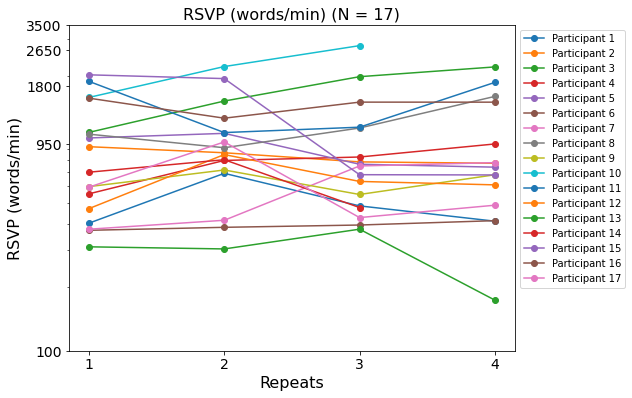

In [76]:
plot_thresholds(rsvp, var_name="RSVP (words/min)", ylims = [100, 3500])

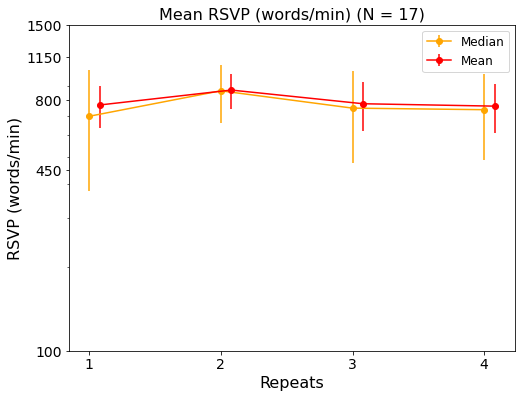

In [77]:
plot_mean_thresholds(rsvp, var_name="RSVP (words/min)", ylims = [100, 1500])

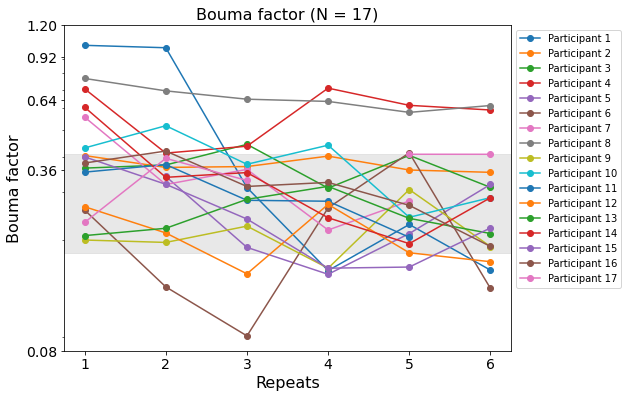

In [78]:
plot_thresholds(bouma, var_name="Bouma factor")

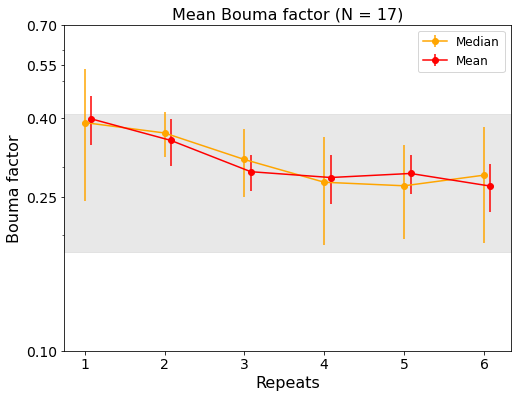

In [79]:
plot_mean_thresholds(bouma, var_name="Bouma factor")

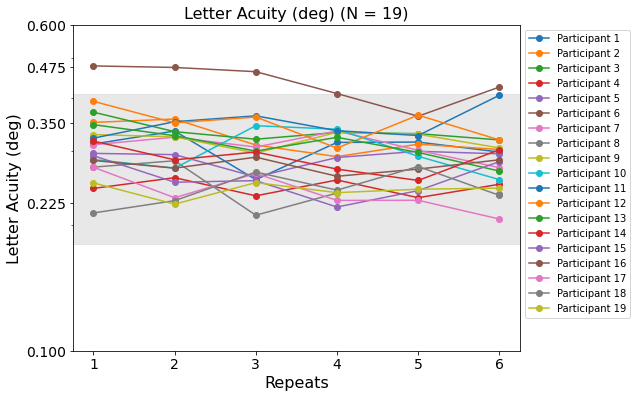

In [101]:
plot_thresholds(acuity, var_name="Letter Acuity (deg)", ylims = [0.1, 0.6])

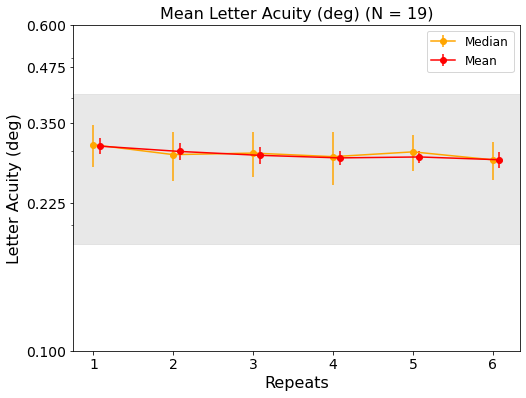

In [107]:
plot_mean_thresholds(acuity, var_name="Letter Acuity (deg)", ylims = [0.1, 0.6])

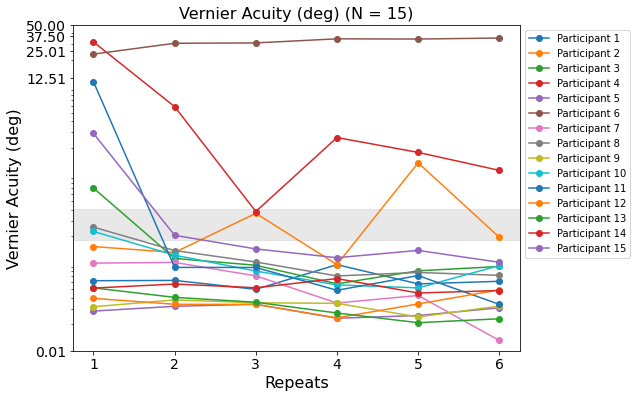

In [82]:
plot_thresholds(vernier, var_name="Vernier Acuity (deg)", ylims = [0.01, 50])

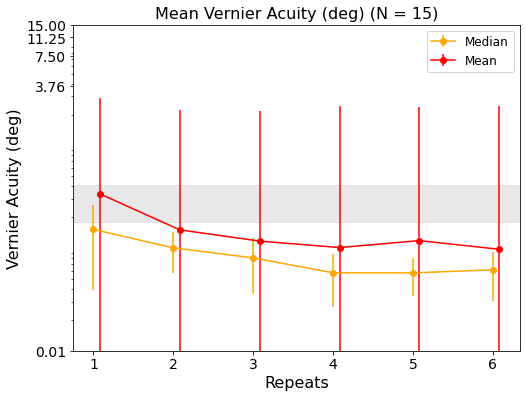

In [83]:
plot_mean_thresholds(vernier, var_name="Vernier Acuity (deg)", ylims = [0.01, 15])

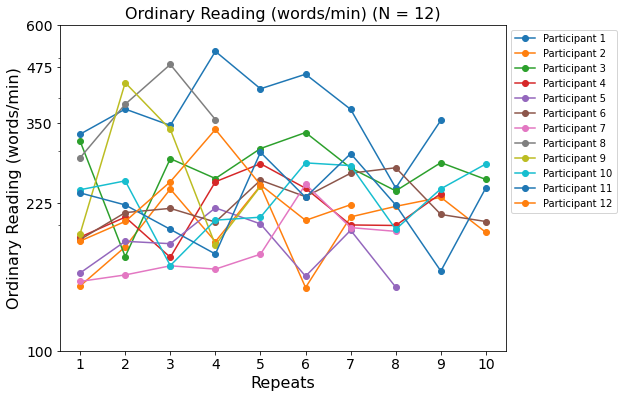

In [84]:
plot_thresholds(reading, var_name="Ordinary Reading (words/min)", ylims = [100, 600])

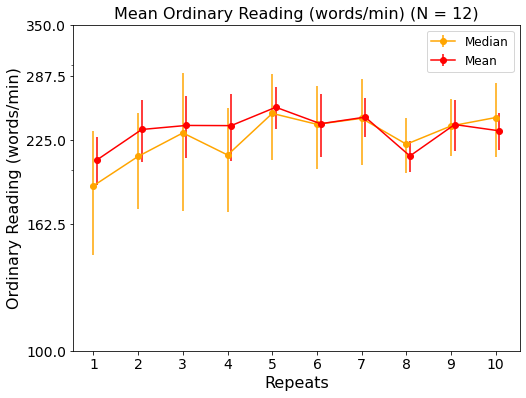

In [85]:
plot_mean_thresholds(reading, var_name="Ordinary Reading (words/min)", ylims = [100, 350])